## Proyecto 1 
Alumno: Walter Alexander Ajtun Pisquiy

## 1.  Crear un entorno de anaconda con los paquetes que considere necesarios.

In [4]:
#Cargamos librerias
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LinearRegression


In [5]:
#Cargamos Data
datos = np.load('proyecto_training_data.npy')
print (datos)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [16]:
datos = np.load('proyecto_training_data.npy')
df = pd.DataFrame(datos)
df.columns =   ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


## Analizamos la data

In [8]:
print(datos.shape) # dimension 1460 filas y 6 columnas

print (datos.dtype) # tipo

print(datos.size)# tamano


(1460, 6)
float64
8760


## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validacion y pruebas(20%).

In [9]:
#Se realiza el Slicing en el data set, 80% del data para para entretenimiento y el 20 para confirmar los modelos.
# Primero obtenemos la cantidad total de filas en los datos para realizar el slicing
total_filas = datos.shape[0]

# Calculamos el número de filas para el conjunto de entrenamiento (80%)
filas_entrenamiento = int(0.8 * total_filas)

# Obtenemos los datos de entrenamiento
datos_entrenamiento = datos[:filas_entrenamiento]

# Obtenemos los datos de validación y pruebas
datos_validacion_pruebas = datos[filas_entrenamiento:]


## 3 . Analisis exploratorio de datos:
Para cada variable en el dataset calcular((usando numpy o
pandas):
media
valor maximo
valor mınimo
rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
desviaci´on est´andar.

In [10]:
# Asignar nombres a las columnas  para una mejor comprensión
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=column_names)
print("Realizando análisis exploratorio para las variables")

# Calcular las estadísticas para cada variable
estadisticas = pd.DataFrame({
    'Variable': column_names,
    'Media': df.mean(),
    'Máximo': df.max(),
    'Mínimo': df.min(),
    'Rango': df.max() - df.min(),
    'Desviación Estándar': df.std()
})

# Mostrar las estadísticas utilizando tabulate
print(tabulate(estadisticas, headers='keys', tablefmt='fancy_grid', showindex=False))


Realizando análisis exploratorio para las variables
╒══════════════╤══════════════╤══════════╤══════════╤═════════╤═══════════════════════╕
│ Variable     │        Media │   Máximo │   Mínimo │   Rango │   Desviación Estándar │
╞══════════════╪══════════════╪══════════╪══════════╪═════════╪═══════════════════════╡
│ SalePrice    │ 180921       │   755000 │    34900 │  720100 │           79442.5     │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ OverallQual  │      6.09932 │       10 │        1 │       9 │               1.383   │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ 1stFlrSF     │   1162.63    │     4692 │      334 │    4358 │             386.588   │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ TotRmsAbvGrd │      6.51781 │       14 │        2 │      12 │               1.62539 │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼─────

### 4.	Para  cada  variable  en  el  dataset  usar  seaborn(funcion  distplot  https://seaborn.pydata. org/generated/seaborn.distplot.html) para graficar un histograma de la variable.
Estaditica

C:\Users\walte\AppData\Local\Temp\ipykernel_36812\3326143990.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=False, color='blue', bins=20)  # Graficar histograma con 20 bins


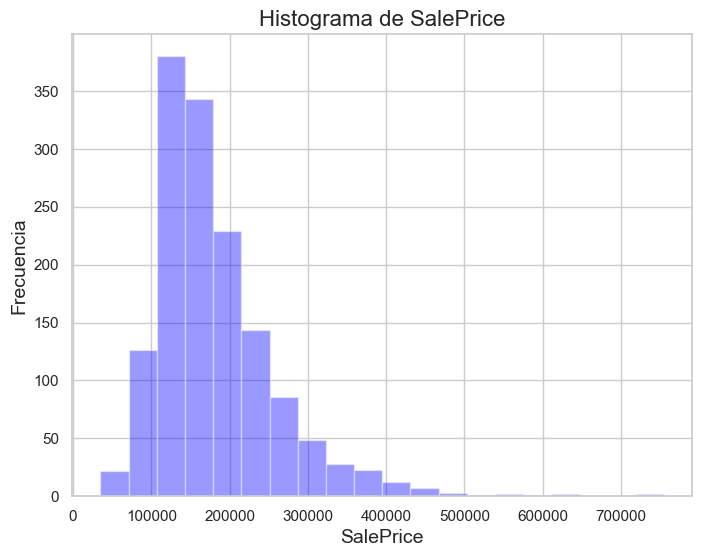

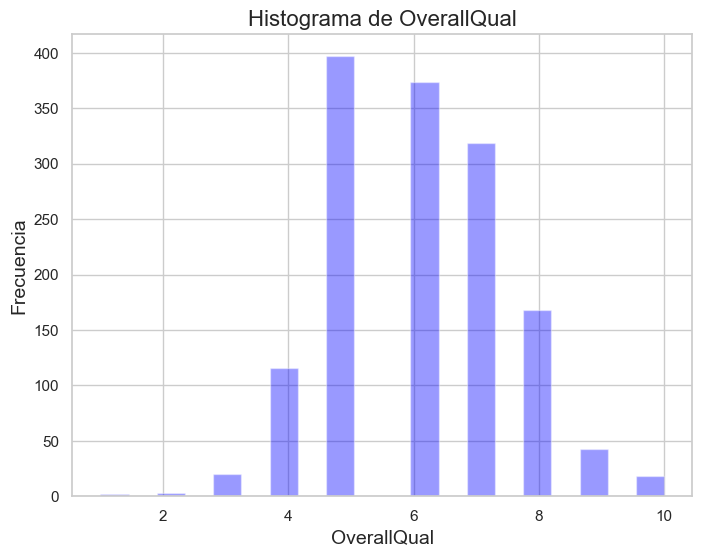

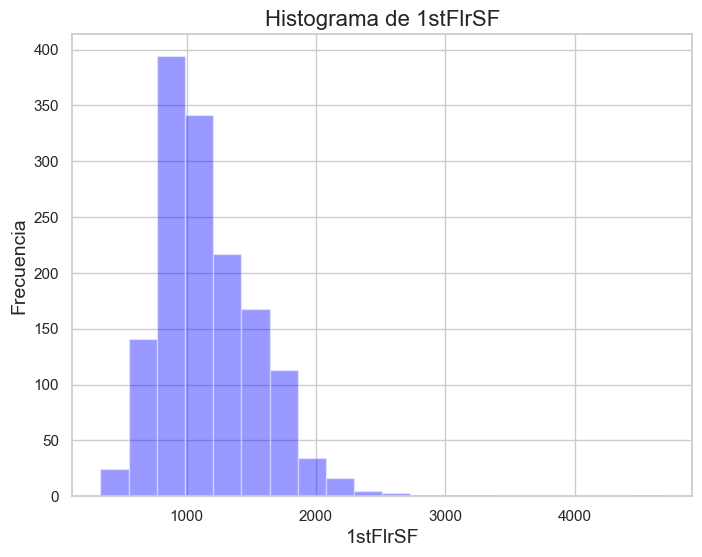

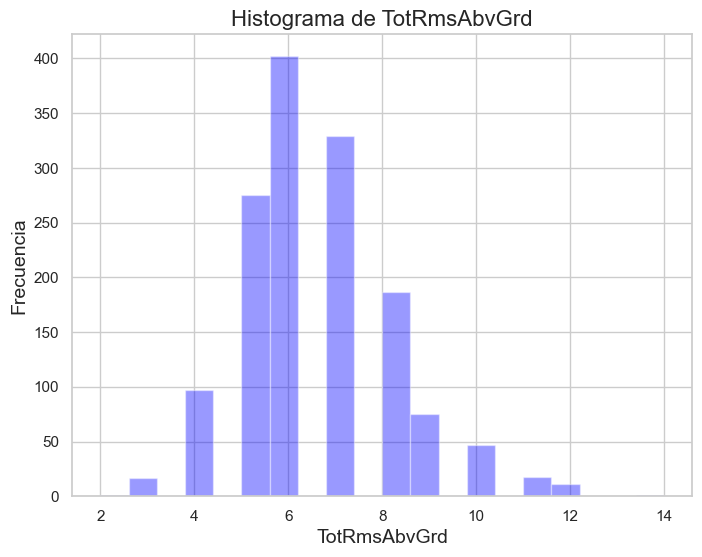

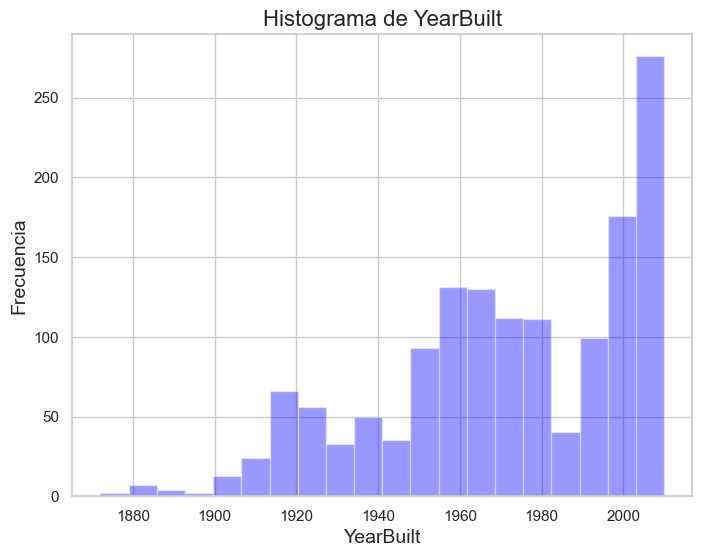

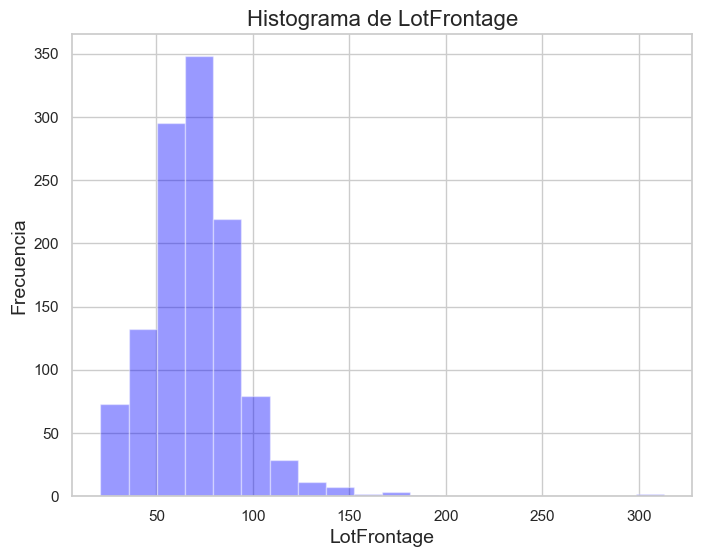

In [11]:
# Asignar nombres a las columnas  para una mejor comprensión
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=column_names)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Iterar sobre cada variable y graficar su histograma
for column in column_names:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], kde=False, color='blue', bins=20)  # Graficar histograma con 20 bins
    plt.title(f'Histograma de {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.show()


## 5. Para cada variable independiente x :
Calcular el coeficiente de correlacion entre x y y.
Graficar x vs y(scatterplot) usando matplotlib.
Colocar el coeficiente de correlaci´on y colocarlo como parte del tıtulo de la grafica.
Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables
con mas potencial predictivo es decir las 2 variables que presentan mayor correlaci´on
entre dicha variable y la variable dependiente.

Se toma como variable dependiente "SalePrice "al precio de las casas, de esta forma se analizar el impacto y el precion, con esto las variables
independientes son OverallQual, 1stFlrSF, TotRmsAbvGrd, YearBuilt, LotFrontage

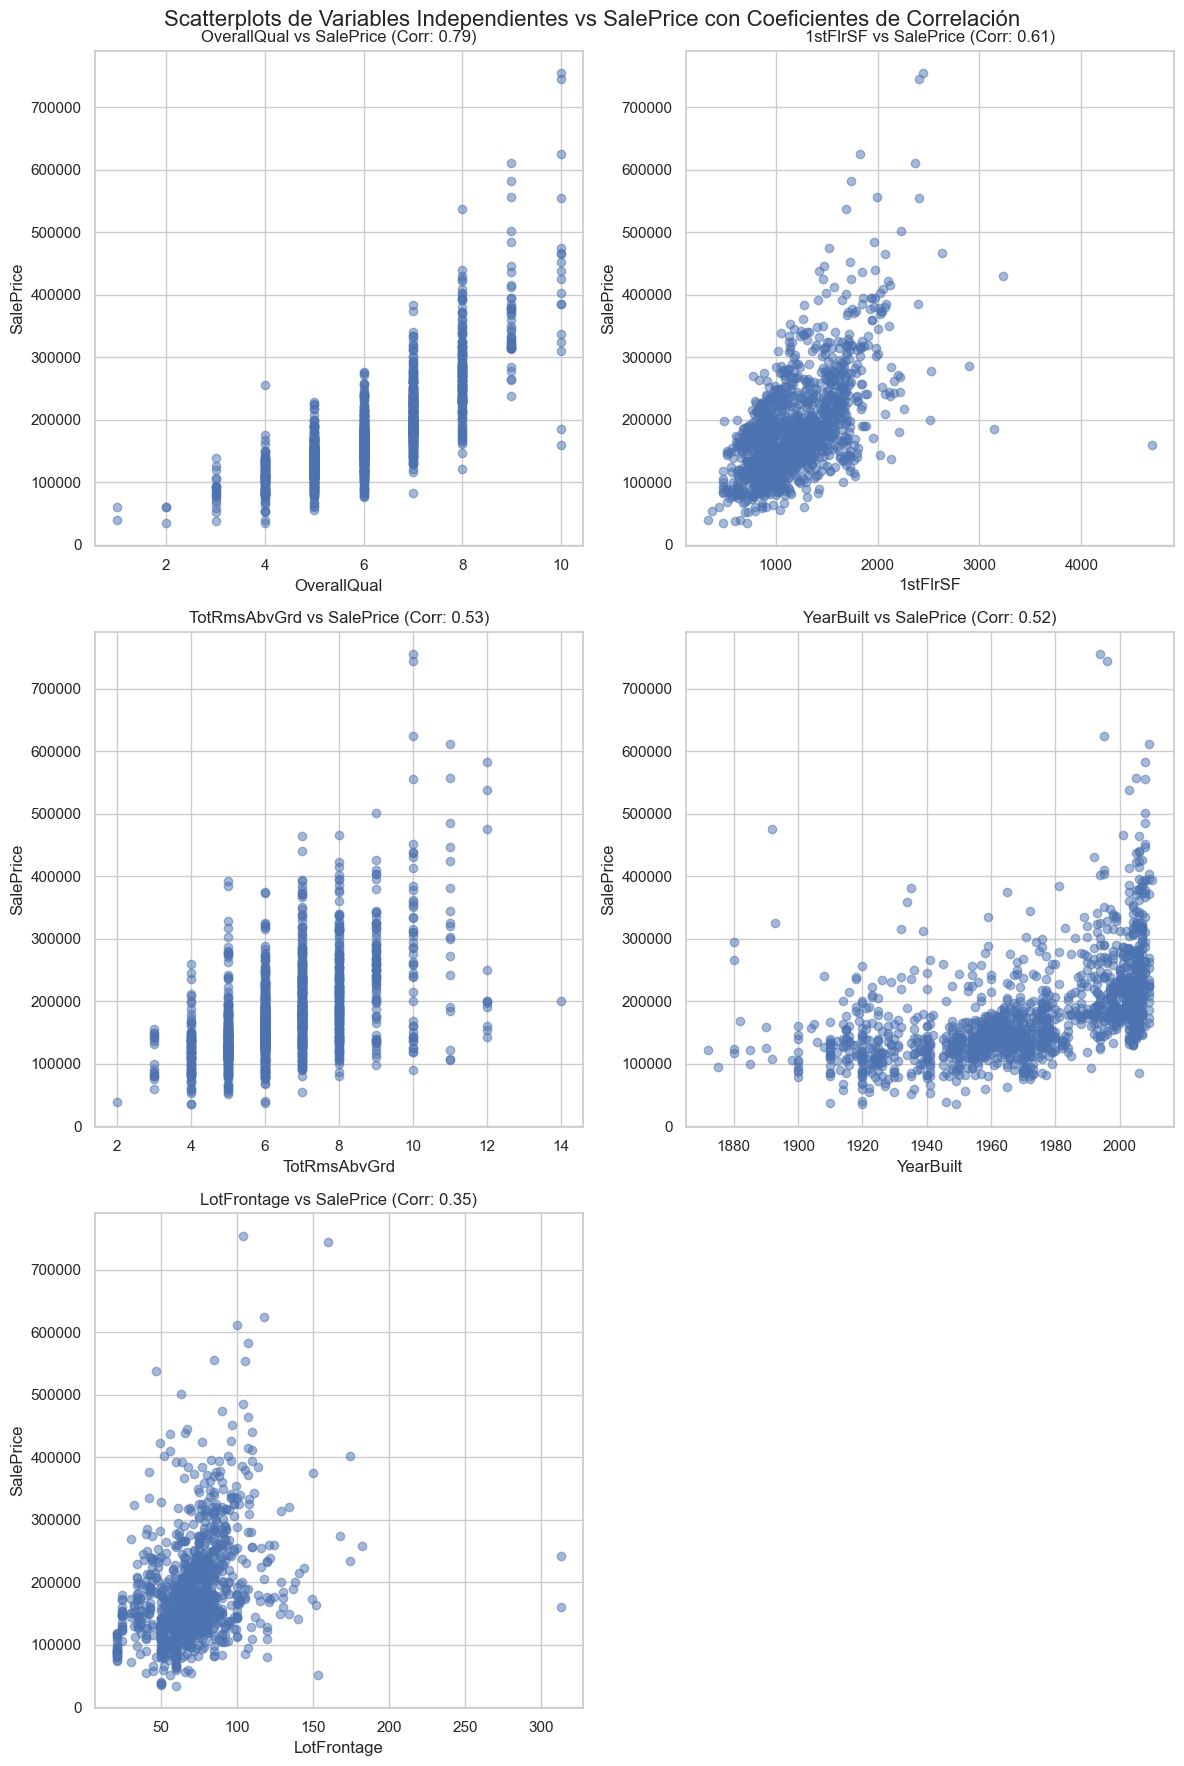

Las 2 variables con mayor potencial predictivo son: ['OverallQual', '1stFlrSF']


In [17]:
# Asignar nombres a las columnas en inglés para una mejor comprensión
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=column_names)

# Calcular el coeficiente de correlación entre cada variable independiente x y la variable dependiente y
correlation_coeffs = df.corr()['SalePrice'].drop('SalePrice')  # Eliminar la correlación consigo misma

# Determinar el número de subgráficos necesarios
num_plots = len(correlation_coeffs)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Graficar x vs y como scatterplot y colocar el coeficiente de correlación en el título
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Scatterplots de Variables Independientes vs SalePrice con Coeficientes de Correlación', fontsize=16)

for i, column in enumerate(correlation_coeffs.index):
    ax = axs[i // num_cols, i % num_cols]
    ax.scatter(df[column], df['SalePrice'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'{column} vs SalePrice (Corr: {correlation_coeffs[column]:.2f})')

# Ocultar cualquier subgráfico vacío
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

# Seleccionar las 2 variables con mayor coeficiente de correlación
top_variables = correlation_coeffs.abs().nlargest(2).index.tolist()
print(f'Las 2 variables con mayor potencial predictivo son: {top_variables}')


## Modelo lineal
La funcion recibe como argumentos:
#### 6.1 Vector con la variable independiente x,
#### 6.2 Vector con la variable dependiente y,
#### 6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
#### 6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos
imprimir a trav´es de print: el n´umero de iteraci´on, el error del modelo en esa iteraci
´on, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
10,20,30,40,50.
#### 6.5 escalar α(learning rate): es usado como parte de la expresion matematica para actualizar
en cada iteraci´on los par´ametros del modelo.

In [62]:
import numpy as np
import matplotlib.pyplot as plt

class MySimpleRegression:

    def __init__(self, beta0, beta1):
        """
        Constructor de la clase, inicializa los coeficientes
        :param beta0: Intercepto de la recta
        :param beta1: Pendiente de la recta
        """
        self.beta0 = beta0
        self.beta1 = beta1
        self.models = {}  # Para almacenar los coeficientes de cada iteración
        self.errors = []  # Para almacenar el error de cada iteración

    def train_model(self, x, y, epochs, print_error_every, learning_rate):
        x = np.array(x)
        y = np.array(y)
        mat = np.column_stack((x, np.ones_like(x)))  # Crear matriz de diseño
        model = np.array([self.beta1, self.beta0])  # Modelo inicial
        
        for k in range(epochs):
            y_hat = np.dot(mat, model)  # Predicciones del modelo actual
            error = (1 / 2) * np.mean((y_hat - y) ** 2)  # Cálculo del error cuadrático medio
            if (k + 1) % print_error_every == 0:
                print(f'Iteración {k + 1}: Error {error}')
            self.errors.append(error)
            
            # Gradientes para actualización de coeficientes
            gradient = np.array([
                np.mean((y_hat - y) * x),
                np.mean(y_hat - y)
            ])
            
            model = model - learning_rate * gradient  # Actualización de coeficientes
            self.models[k] = model

        return self.models, self.errors

    def grafi_errores(self):
        if len(self.errors) == 0:
            print("Aún no se cuentan con errores para graficar.")
            return
        
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(self.errors)), self.errors, label='Error a lo largo de las iteraciones')  # Se agregó esta línea
        plt.xlabel('Iteración')
        plt.ylabel('Error')
        plt.title('Error a lo largo de las iteraciones')
        plt.legend()
        plt.show()

    def grafi_model(self, n):
        # Solo graficamos los modelos cada n iteraciones
        selected_keys = [key for key in self.models.keys() if key % n == 0]
        values = np.array([self.models[key] for key in selected_keys])
        x = values[:, 0]
        y = values[:, 1]

        plt.figure(figsize=(10, 5))
        plt.scatter(x, y, label=f'Coeficientes cada {n} iteraciones')
        plt.xlabel('Beta1 (pendiente)')
        plt.ylabel('Beta0 (intercepto)')
        plt.title('Evolución de los coeficientes del modelo')
        plt.legend()
        plt.show()


In [75]:
# Asumiendo que la clase MySimpleRegression y el DataFrame df ya están definidos
ModeloOverallQual = MySimpleRegression(1, 1)
mo_manual, errs = ModeloOverallQual.train_model(
    x=df['OverallQual'],
    y=df['SalePrice'],
    epochs=100,
    print_error_every=10,
    learning_rate=0.04
)


Iteración 10: Error 1422537465.914914
Iteración 20: Error 1411552373.9413702
Iteración 30: Error 1402890979.4408824
Iteración 40: Error 1394554299.453987
Iteración 50: Error 1386530087.0889769
Iteración 60: Error 1378806630.7245262
Iteración 70: Error 1371372657.7063532
Iteración 80: Error 1364217317.8912294
Iteración 90: Error 1357330167.8108165
Iteración 100: Error 1350701155.4290605


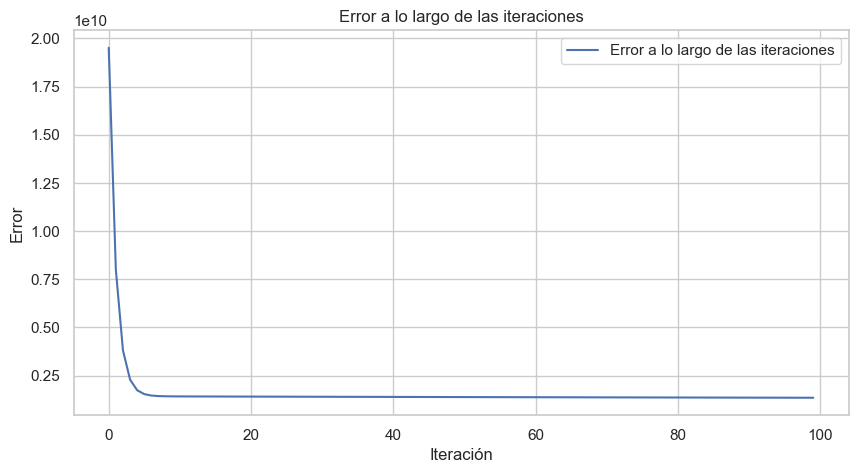

In [76]:
ModeloOverallQual.grafi_errores()

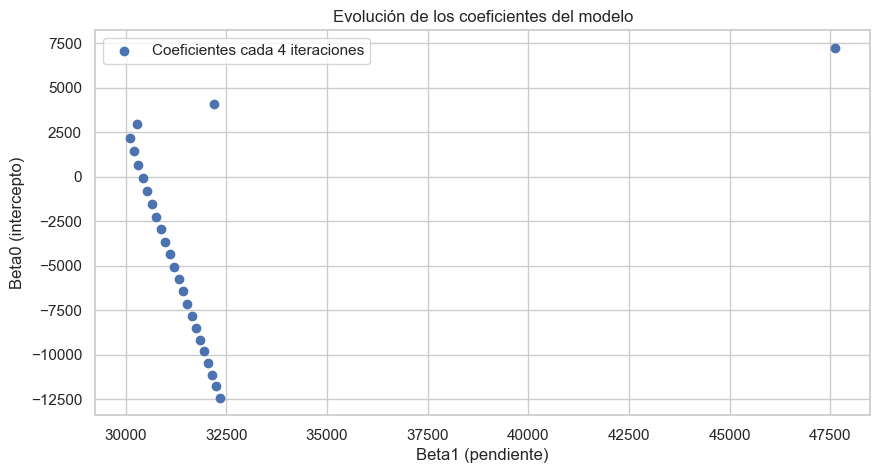

In [65]:
OverallQualModel.grafi_model(4)

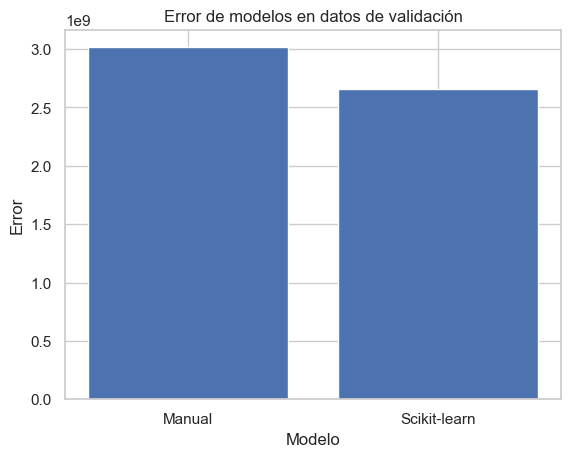

El modelo de scikit-learn es mejor, con un error de 2659978239.232014


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(df['OverallQual'].values, df['SalePrice'].values, test_size=0.2, random_state=42)

# Predecir con el modelo entrenado manualmente
pred_manual_val = model.predict(x_val)

# Predecir con el modelo de scikit-learn
pred_sklearn_val = model_sklearn.predict(x_val.reshape(-1, 1))

# Calcular el error para cada modelo
error_manual = mean_squared_error(y_val, pred_manual_val)
error_sklearn = mean_squared_error(y_val, pred_sklearn_val)

# Graficar el error de cada modelo
plt.bar(['Manual', 'Scikit-learn'], [error_manual, error_sklearn])
plt.title('Error de modelos en datos de validación')
plt.xlabel('Modelo')
plt.ylabel('Error')
plt.show()

# Concluir cuál modelo es mejor
if error_manual < error_sklearn:
    print('El modelo entrenado manualmente es mejor, con un error de', error_manual)
else:
    print('El modelo de scikit-learn es mejor, con un error de', error_sklearn)
